# Pre-processing

In [ ]:
import numpy as np
import scipy
from matplotlib.animation import FuncAnimation
from scipy.special import gamma
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# generating the data set of coin tosses\
np.random.seed(5824)
distribution = np.random.randint(2, size = 160)
mean = sum(distribution)/160
print(f'Mean = {mean}')

Mean = 0.65


In [ ]:
# creating points on real line to get inputs for prior 
mean_points = np.linspace(0, 1, 200)

In [ ]:
# mean of prior beta distribution is a/a+b = 0.4
# so a = 2, b = 3
a = 2
b = 3


In [ ]:
# The normalization coefficient for the beta distribution

num = gamma(a+b)
den = ((gamma(a))*gamma(b))
coeff = num/den

The next cell gives the prior probabiltity distribution 

In [ ]:
#Prior distribution
prior = [(x**(a-1))*((1-x)**(b-1)) for x in mean_points]

# Normalization
prior = [coeff*x for x in prior]

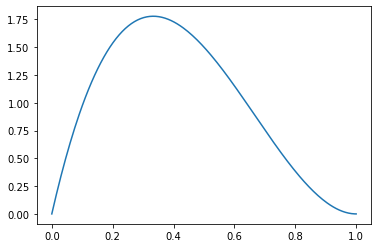

In [ ]:
plt.plot(mean_points, prior)
plt.show()

# Part A
## Sequential application of Bayesian Inference.


 

F bernouli, the likelihood is given by :

$\mu^{x}(1 - \mu)^{1-x}$

for one coin toss



In [ ]:
#This function calculates the likelihood for a single toss
def likelihood_A(mean, x):
  return (mean**x)*((1- mean)**(1-x))

In [ ]:
# declaring the posterior array
posterior_A = np.ones(200, dtype=np.float64)

In [ ]:
post_matrix = []
post_matrix.extend(prior)

In [ ]:
def cal(a, b):
  return ((gamma(a+b))/((gamma(a))*(gamma(b))))

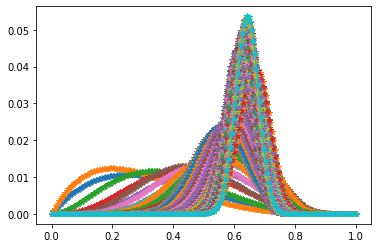

In [ ]:
# for each of the 160 coin tosses, likeihood is calculated.
# Then we get posterior from the likelihood and prior
# posterior is assigned to prior and posterior is calcuted again.

for toss in distribution:

  if(toss == 1):
    a+= 1
  else: 
    b+= 1

  posterior_A = [((mean**(a-1)*(1-mean)**(b-1))) for mean in mean_points]
  coeffA = cal(a, b)
  posterior_A = [coeffA*x for x in posterior_A]

  posterior_A = [x/sum(posterior_A) for x in posterior_A]
  post_matrix.extend(posterior_A)
  plt.plot(mean_points, posterior_A, '-*') 

  

#Animation



In [ ]:
post_matrix = np.array(post_matrix)
post_matrix.resize((161,200))
print(len(post_matrix))
print(len(post_matrix[0]))

161
200


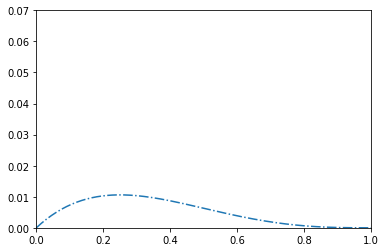

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0,1)
ax.set_ylim((0,0.07))
line, = ax.plot([],[],'-.')

def animate(i): 
  x = mean_points
  y = post_matrix[i,:]
  line.set_data(x,y)
  return (line,)


anim = FuncAnimation(fig, animate, frames=np.arange(1,160),interval=100,blit = True)
plt.show()


In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())

# Part B

## Using all the tosses at one

The likelihood function for bernouli distribution is given by:

$\prod_{x\in toss}(\mu^{x}(1 - \mu)^{1-x})$

for n coin toss.





In [ ]:
def likelihood_B(mean, toss_list):
  freq = len(toss_list)
  heads = sum(toss_list)
  return ((mean**heads)*((1-mean)**(freq-heads)))

In [ ]:
posterior_B = np.ones(200, dtype= np.float64)

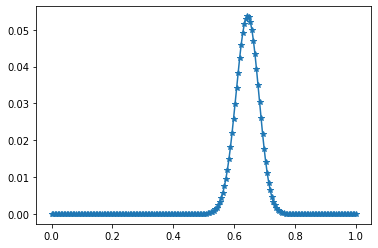

In [ ]:
likelihood_list = [likelihood_B(mean, distribution) for mean in mean_points]
posterior_B = np.multiply(likelihood_list, prior)
coeff_B = sum(posterior_B)
posterior_B = posterior_B/coeff_B
plt.plot(mean_points, posterior_B, '-*')
plt.show()